# Review

Let's review some statistical and plotting knowledge that you've learned during Statistics week.

In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## Plot the Google lunch hour distribution

Assume that Google employee lunch hours can be modeled by a normal distribution with a mean of 2 hrs and a standard deviation of 30 minutes.  Plot the probability density function vs. lunch hour time.  Your result should look like the image below.

<img src="images/google_lhr_dist.png" alt="Drawing" style="width: 400px;"/>

Here are some hints to help you re-create this figure:    
* Try using a plot style, e.g. `plt.style.use('ggplot')` or `plt.style.use('fivethirtyeight')`
* Use `stats.norm` to make the distribution.  Instantiate the distribution as an object, e.g. `lunch = stats.norm(loc=..., scale=...)`.
* Use `np.linspace` to make your x values (the lunch hours).  
* Use the percentile point function (`.ppf`) method to ensure that your x values cover 99.8% of the distribution.
* Use the `.pdf` method on the norm object and your x values (lunch hours) to make the pdf of the lunch hours (your y-values).
* Use the object oriented way of making a plot, i.e. `fig, ax = plt.subplots(1,1)`, then `ax.plot(...`    
* Label your x and y axis labels using `ax.set_xlabel(...`, `ax.set_ylabel(...`
* Title your plot using `ax.set_title(...`
* Include a legend, `ax.legend(..`.  The legend will use whatever label you give the data in your `ax.plot(...., label='your label')` command.
<br>    
You can see almost all the hints above in action [here.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

In [13]:
lunch = stats.norm(loc=2, scale=0.5)
lunch.ppf((1+p)/2)

3.5451161530839066

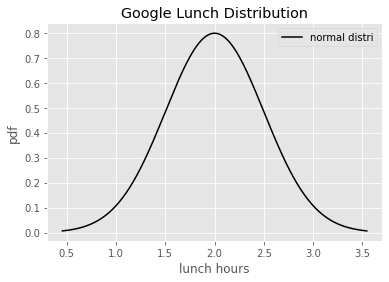

In [16]:
lunch_mean = 2
lunch_std = 0.5
lunch = stats.norm(loc=lunch_mean, scale=lunch_std)

fig, ax = plt.subplots()
p=0.998
x = np.linspace(lunch.ppf((1-p)/2), lunch.ppf((1+p)/2), 250)

ax.plot(x, lunch.pdf(x), color='black', label='normal distri')
ax.set_xlabel('lunch hours')
ax.set_ylabel('pdf')
ax.set_title('Google Lunch Distribution')
ax.legend(loc='upper right');


                
            

## Find the middle 95% of the distribution
Use the percentile point function (ppf) to determine both the lower and upper bounds of the middle 95% of lunch hours.  
Find and print them (to two decimal places), then recreate the plot above and include vertical red, dashed, narrow lines at these upper and lower bounds. Your result should look like the image below.   

<img src="images/middle_95_lined.png" alt="Drawing" style="width: 400px;"/>



Hints:  
* ppf is used [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) to find values associated with 1% and 99% (you want 2.5% and 97.5%).  
* `axvline` is documented [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.axvline.html)  
* You will want to use `color='red'`, `linestyle='--'` and `linewidth=1` to get red, dashed, narrow vertical lines in your plot.  
* Use f string notation along with a desired number of float digits to control the number of digits displayed when your print out the values.  See this [StackOverflow answer](https://stackoverflow.com/questions/45310254/fixed-digits-after-decimal-with-f-strings)

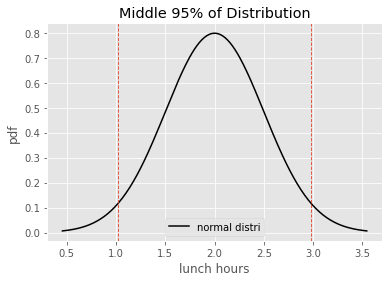

In [28]:
lunch_mean = 2
lunch_std = 0.5
lunch = stats.norm(loc=lunch_mean, scale=lunch_std)

fig, ax = plt.subplots()
p=0.998
x = np.linspace(lunch.ppf((1-p)/2), lunch.ppf((1+p)/2), 250)

ax.plot(x, lunch.pdf(x), color='black', label='normal distri')

p = 0.95
ax.axvline(lunch.ppf((1-p)/2), ls='--', lw=.9)
ax.axvline(lunch.ppf((1+p)/2), ls='--', lw=.9)

ax.set_xlabel('lunch hours')
ax.set_ylabel('pdf')
ax.set_title('Middle 95% of Distribution')
ax.legend(loc='lower center');


## Label the middle 95% using `ax.fill_between`

Instead of labeling the middle 95% of the distribution with vertical lines, color it differently using `ax.fill_between(...`.  Your plot should look like this when you're done.

<img src="images/middle_95_filled.png" alt="Drawing" style="width: 400px;"/>

<br>  
[Here](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/fill_between_demo.html) is a link to documentation for `ax.fill_between(...`.  Note that the where clause takes a boolean array of the same length as your x-axis values, where `True` indicates to fill.  You can use the `np.where` as shown in the documentation, or simply provide a masked array.

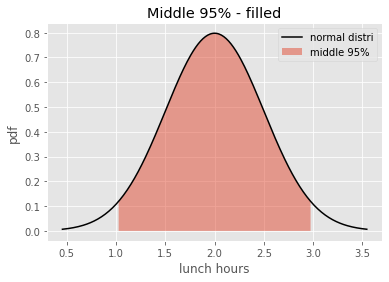

In [34]:
lunch_mean = 2
lunch_std = 0.5
lunch = stats.norm(loc=lunch_mean, scale=lunch_std)

fig, ax = plt.subplots()
p=0.998
x = np.linspace(lunch.ppf((1-p)/2), lunch.ppf((1+p)/2), 250)

ax.plot(x, lunch.pdf(x), color='black', label='normal distri')

p = 0.95
ax.fill_between(x, lunch.pdf(x), 
                where= ( (x >=lunch.ppf((1-p)/2)) * ( x <= lunch.ppf((1+p)/2))), 
                alpha=0.5, label='middle 95%')

ax.set_xlabel('lunch hours')
ax.set_ylabel('pdf')
ax.set_title('Middle 95% - filled')
ax.legend(loc='upper right');


## Let's talk likelihoods and probabilities
* What's the [likelihood](https://www.youtube.com/watch?v=pYxNSUDSFH4) that someone takes a 3 hour, 15 minute lunch?
* What's the probability that someone takes spends between 3 hours 14 minutes and 3 hours 16 minutes at lunch?
* What's the probability that someone takes a lunch more than 3 hours 15 minutes?  Plot it. You should get a figure like that shown below.  

<img src="images/gt_315.png" alt="Drawing" style="width: 400px;"/>

Hint:  Use the cumulative distribution method `.cdf` to determine probabilities.

In [37]:
lunch.pdf(x=3+(15/60))

0.03505660098713708

In [38]:
lunch.cdf(x=3+(16/60)) - lunch.cdf(x=3+(14/60))

0.0011696895146154906

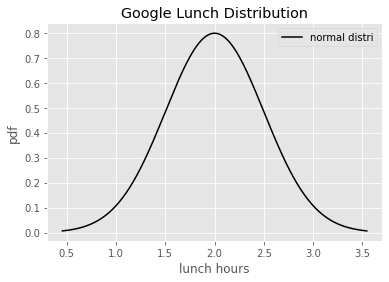

In [35]:
lunch_mean = 2
lunch_std = 0.5
lunch = stats.norm(loc=lunch_mean, scale=lunch_std)

fig, ax = plt.subplots()
p=0.998
x = np.linspace(lunch.ppf((1-p)/2), lunch.ppf((1+p)/2), 250)

ax.plot(x, lunch.pdf(x), color='black', label='normal distri')
ax.fill_between(x, lunch.pdf(x), where=)
ax.set_xlabel('lunch hours')
ax.set_ylabel('pdf')
ax.set_title('Google Lunch Distribution')
ax.legend(loc='upper right');



# Review answers 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('ggplot')
plt.rcParams.update({'font.size': 13})

### Plot the Google lunch hour distribution

In [ ]:
mu = 2 # mean
sigma = 0.5 #standard deviation

lunch = stats.norm(loc=mu, scale=sigma)

time_low = lunch.ppf(0.001)
time_high = lunch.ppf(0.999)
num_times = 100

times = np.linspace(time_low, time_high, num_times)
lunch_pdf = lunch.pdf(times)

print(time_low.round(2))
print(time_high.round(2))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

ax.plot(times, lunch_pdf, c='k', label = 'distribution')
ax.set_xlabel('time taken for lunch')
ax.set_ylabel('pdf')
ax.set_title('Google lunch distribution')
ax.legend()
plt.show()

### Find the middle 95% of the distribution

In [ ]:
time_025 = lunch.ppf(0.025)
time_975 = lunch.ppf(0.975)

fig, ax = plt.subplots(1, 1, figsize=(7,5))

ax.plot(times, lunch_pdf, c='k', label = 'distribution')
ax.axvline(time_025, color='red', linestyle='--', linewidth=1)
ax.axvline(time_975, color='red', linestyle='--', linewidth=1)
ax.set_xlabel('time taken for lunch')
ax.set_ylabel('pdf')
ax.set_title('Middle 95% of distribution')
ax.legend()
plt.tight_layout()
plt.show()

### Label the middle 95% using `ax.fill_between`

In [ ]:
mask_gt = times >= time_025
mask_lt = times <= time_975
mask_middle = mask_gt & mask_lt

fig, ax = plt.subplots(1, 1, figsize=(7,5))

ax.plot(times, lunch_pdf, c='k', label = 'distribution')
ax.fill_between(times, lunch_pdf, 0, 
                where=mask_middle, color="red", alpha=0.2, label='middle 95%')
ax.set_xlabel('time taken for lunch')
ax.set_ylabel('pdf')
ax.set_title('Middle 95% - filled')
ax.legend(loc='upper right')
plt.tight_layout(w_pad=0.5)
plt.show()

### Let's talk likelihoods and probabilities

In [ ]:
likelihood = lunch.pdf(3.25)
print(f"The likelihood of a 3 hr 15 minute lunch is {likelihood:0.3f}.")
time_314 = 3 + 14/60
time_316 = 3 + 16/60
prob_1 = lunch.cdf(time_316) - lunch.cdf(time_314)
print(f"The probability of a lunch taking between 3 hr 14 min and "
      f"3 hr 16 min is {prob_1:0.4f}.")
prob_2 = 1 - lunch.cdf(3.25)
print(f"The probability of lunch being greater than 3 hr 15 minutes is "
      f"{prob_2:0.4f}.")

In [ ]:
mask_gt = times > 3.25

fig, ax = plt.subplots(1, 1, figsize=(7,5))

ax.plot(times, lunch_pdf, c='k', label = 'distribution')
ax.fill_between(times, lunch_pdf, 0, 
                where=mask_gt, color="red", alpha=0.2, label='> 3hr 15min')
ax.set_xlabel('time taken for lunch')
ax.set_ylabel('pdf')
ax.set_title('Google lunch hour distribution')
ax.legend(loc='upper right')
plt.tight_layout(w_pad=0.5)
plt.show()

<br>  
<br>  
<br>  
<br>  

###  Check for understanding: Binomial Probabilities  
They're approximately the same.

In [39]:
n = 10000
p = 0.5
coin_binom = stats.binom(n,p)
prob_binom = coin_binom.cdf(5100) - coin_binom.cdf(4999)
prob_binom.round(3)

0.482

In [40]:
mu = n * p
std = np.sqrt(n * p * (1 - p))
coin_norm = stats.norm(mu, std)
prob_norm = coin_norm.cdf(5100) - coin_norm.cdf(4999)
prob_norm.round(3)

0.485